In [1]:
import pandas as pd
import numpy as np

# Tạo dữ liệu giả lập (giả sử có 100 người tham gia khảo sát)
np.random.seed(42)
n_samples = 100

# Tạo các triệu chứng nhị phân (0 = không có, 1 = có)
data = {
    'trieu_chung_1_buon_keo_dai': np.random.randint(0, 2, n_samples),
    'trieu_chung_2_mat_hung_thu': np.random.randint(0, 2, n_samples),
    'trieu_chung_3_thay_doi_can_nang': np.random.randint(0, 2, n_samples),
    'trieu_chung_4_roi_loan_giac_ngu': np.random.randint(0, 2, n_samples),
    'trieu_chung_5_van_dong_bat_thuong': np.random.randint(0, 2, n_samples),
    'trieu_chung_6_met_moi': np.random.randint(0, 2, n_samples),
    'trieu_chung_7_toi_loi': np.random.randint(0, 2, n_samples),
    'trieu_chung_8_kho_tap_trung': np.random.randint(0, 2, n_samples),
    'trieu_chung_9_tu_sat': np.random.randint(0, 2, n_samples),
    'anh_huong_cong_viec_xa_hoi': np.random.randint(0, 2, n_samples),
    'su_dung_chat': np.random.randint(0, 2, n_samples),
    'tien_su_roi_loan_tam_than_khac': np.random.randint(0, 2, n_samples)
}

df = pd.DataFrame(data)

# Tính tổng số triệu chứng trong tiêu chí A
symptom_cols = [col for col in df.columns if 'trieu_chung' in col]
df['tong_trieu_chung'] = df[symptom_cols].sum(axis=1)

# Gán nhãn theo DSM-5: >=5 triệu chứng và có ít nhất một trong hai triệu chứng chủ chốt
df['label_tram_cam'] = np.where(
    (df['tong_trieu_chung'] >= 5) & 
    ((df['trieu_chung_1_buon_keo_dai'] == 1) | (df['trieu_chung_2_mat_hung_thu'] == 1)),
    1,  # Có trầm cảm
    0   # Không trầm cảm
)

df.head()

,trieu_chung_1_buon_keo_dai,trieu_chung_2_mat_hung_thu,trieu_chung_3_thay_doi_can_nang,trieu_chung_4_roi_loan_giac_ngu,trieu_chung_5_van_dong_bat_thuong,trieu_chung_6_met_moi,trieu_chung_7_toi_loi,trieu_chung_8_kho_tap_trung,trieu_chung_9_tu_sat,anh_huong_cong_viec_xa_hoi,su_dung_chat,tien_su_roi_loan_tam_than_khac,tong_trieu_chung,label_tram_cam
0,0,0,0,0,1,0,0,1,0,0,1,0,2,0
1,1,1,1,0,1,0,1,1,1,1,0,1,7,1
2,0,1,0,0,0,0,1,0,0,1,0,1,2,0
3,0,1,0,1,0,1,1,1,0,0,0,0,5,1
4,0,1,1,1,1,0,0,0,1,0,0,1,5,1


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dữ liệu mẫu dựa trên DSM-5
# 1: Có triệu chứng, 0: Không có triệu chứng
data = {
    'buon_keo_dai': [0, 1, 0, 0, 0],
    'mat_hung_thu': [0, 1, 1, 1, 1],
    'thay_doi_can_nang': [0, 1, 0, 0, 1],
    'roi_loan_giac_ngu': [0, 0, 0, 1, 1],
    'van_dong_bat_thuong': [1, 1, 0, 0, 1],
    'met_moi': [0, 0, 0, 1, 0],
    'toi_loi': [0, 1, 1, 1, 0],
    'kho_tap_trung': [1, 1, 0, 1, 0],
    'tu_sat': [0, 1, 0, 0, 1],
    'co_tram_cam': [0, 1, 0, 1, 1]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Chia dữ liệu
X = df.drop('co_tram_cam', axis=1)
y = df['co_tram_cam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Thử nghiệm với dữ liệu mới
data_moi = pd.DataFrame([{
'buon_keo_dai': 0,
    'mat_hung_thu': 1,
    'thay_doi_can_nang': 1,
    'roi_loan_giac_ngu': 0,
    'van_dong_bat_thuong': 0,
    'met_moi': 0,
    'toi_loi': 0,
    'kho_tap_trung': 1,
    'tu_sat': 0
}])

du_doan = model.predict(data_moi)
print("\nDự đoán người mới có trầm cảm không:", 'Có' if du_doan[0] == 1 else 'Không')


Báo cáo phân loại:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Dự đoán người mới có trầm cảm không: Không


In [3]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Tạo dữ liệu mẫu dựa theo tiêu chí DSM-5
# 9 triệu chứng chính: mỗi dòng là 1 người, 1 = có triệu chứng, 0 = không có
data = [
    [1, 1, 1, 0, 1, 0, 0, 0, 0],  # 5 triệu chứng, có tiêu chí 1 và 2 -> depressed
    [1, 0, 1, 1, 1, 1, 0, 1, 0],  # 6 triệu chứng, có tiêu chí 1 -> depressed
    [0, 1, 1, 1, 1, 1, 1, 0, 1],  # 7 triệu chứng, có tiêu chí 2 -> depressed
    [1, 0, 0, 0, 0, 0, 0, 0, 0],  # chỉ có 1 triệu chứng -> not depressed
    [0, 0, 0, 0, 0, 0, 0, 0, 0],  # không có triệu chứng nào -> not depressed
    [0, 1, 0, 1, 1, 1, 1, 1, 1],  # có 7 triệu chứng nhưng không có tiêu chí 1 -> not depressed
]

# Hàm đánh nhãn dựa theo tiêu chí DSM-5
def label_depression(row):
    count_symptoms = sum(row)
    if row[0] == 1 or row[1] == 1:  # Có tiêu chí 1 hoặc 2
        if count_symptoms >= 5:
            return 1  # Depressed
    return 0  # Not Depressed

df = pd.DataFrame(data, columns=[
    "sadness", "interest_loss", "weight_change", "insomnia",
    "fatigue", "worthlessness", "concentration", "psychomotor", "suicidal_thought"
])

df["depressed"] = df.apply(label_depression, axis=1)

# Tách dữ liệu thành train/test
X = df.drop("depressed", axis=1)
y = df["depressed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và in kết quả
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Tạo dữ liệu (bạn có thể thay bằng file CSV nếu muốn)
data = {
    'sad_mood':      [1,0,1,1,0,1,1,1,0,1],
    'loss_interest': [1,1,1,1,0,1,1,1,0,1],
    'weight_change': [1,0,1,0,1,1,0,0,0,1],
    'sleep_change':  [1,1,1,1,0,1,1,1,1,1],
    'psychomotor':   [0,1,1,0,0,1,0,0,0,1],
    'fatigue':       [1,1,1,1,0,1,1,1,1,1],
    'worthlessness': [1,0,1,1,0,1,1,1,0,1],
    'concentration': [1,1,1,1,0,1,1,1,1,1],
    'suicidal':      [0,0,1,1,0,1,0,1,0,1],
    'depression':    [1,0,1,1,0,1,1,1,0,1]
}
df = pd.DataFrame(data)

# 2. Chia dữ liệu
X = df.drop('depression', axis=1)
y = df['depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Dự đoán và đánh giá
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.3333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\MN\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MN\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MN\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

def generate_sample(n=200):
    data = []
    for _ in range(n):
        c = np.random.randint(0, 2, size=3)
        p = np.random.randint(0, 2, size=8)
        total_c = c.sum()
        total_p = p.sum()

        if total_c >= 3 and total_p >= 5:
            label = 3  # Nặng
        elif total_c == 2 and total_p >= 5:
            label = 2  # Vừa
        elif total_c == 2 and total_p >= 2:
            label = 1  # Nhẹ
        else:
            label = 0  # Không trầm cảm
        data.append(list(c) + list(p) + [label])
    
    columns = ['C1', 'C2', 'C3'] + [f'P{i+1}' for i in range(8)] + ['label']
    return pd.DataFrame(data, columns=columns)

df = generate_sample(500)
df.to_csv("data.csv", index=False)
print("✅ Tạo file data.csv thành công!")


✅ Tạo file data.csv thành công!


📊 Confusion Matrix:
[[60  0  0  1]
 [12  8  0  0]
 [ 3  1 10  0]
 [ 3  0  0  2]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        61
           1       0.89      0.40      0.55        20
           2       1.00      0.71      0.83        14
           3       0.67      0.40      0.50         5

    accuracy                           0.80       100
   macro avg       0.83      0.62      0.69       100
weighted avg       0.82      0.80      0.78       100



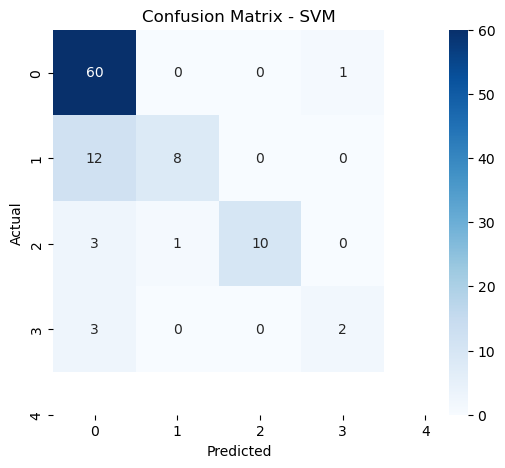

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv("data.csv")
X = data.drop("label", axis=1)
y = data["label"]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Huấn luyện mô hình SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Dự đoán
y_pred = svm.predict(X_test)

# Báo cáo đánh giá
print("📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Trực quan hóa Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()
